In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

In [2]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

b1 = np.sqrt(2)*np.dot(R,a1);  b2 = np.sqrt(2)*np.dot(R,a2); #a2
#b1 = [np.sqrt(2),0]; b2=[0,np.sqrt(2)];

B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

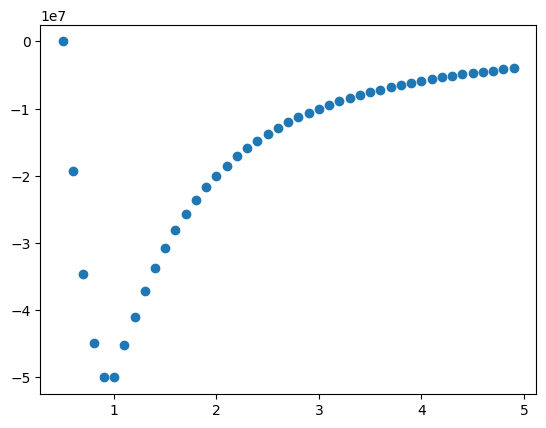

In [3]:
def at_sin(x, up =99999999):
    
    tr_x= (x + 0.5)
    
    if x<1:
        res = up*(1/(1+np.sqrt((x**2))) )* np.sin(tr_x*np.pi) +1/(x+0.00000000000001)
    else:
        res = (x-1)**2 -up*(1/(1+x**2))+1/(x+0.00000000000001)
    return res

X = [i*0.1 for i in range(0,50,1)]
Y= [at_sin(x) for x in X]

plt.scatter(X[5:],Y[5:])

In [4]:
# a = np.array([[0,1],[1,0]])
# b = np.sqrt(2)*np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        tA_lenghth =((tA[0][0]**2+tA[0][1]**2)+(tA[1][0]**2+tA[1][1]**2) )*100
        
        
        f =  at_sin(detTAa)+ tB_con**2 +tA_lenghth
        #((1-detTAa)**2)*k_p + tB_con**2
        
        
        return f 

In [5]:
# Experiment settings

#Hyperparameters of the model
up = 99999999
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': -up
    "start_point":[1,5,3,2]
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,5,3,2]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

In [6]:
epochs= 40
history_book = experiment.evolve( epochs, prints_p=5)

temp:4|epoch:0|change:74999985013500.44|value:24999995028623.035
temp:4|epoch:5|change:-20641.18359375|value:24999994989661.07
temp:4|epoch:10|change:24999959069649.66|value:59973447.33261575
temp:4|epoch:15|change:-52653452.00911098|value:7319995.323504766
temp:4|epoch:20|change:29699290.975056328|value:7319995.323504766
temp:4|epoch:25|change:24999995036565.95|value:-16839.08762127779
temp:4|epoch:30|change:99999980049362.56|value:-16839.08762127779
temp:4|epoch:35|change:24999994871170.95|value:-16839.08762127779
temp:0.0975609756097561|epoch:0|change:25000112008363.35|value:-16839.08762127779
temp:0.0975609756097561|epoch:5|change:24999994634259.25|value:-18639.08762127774
temp:0.0975609756097561|epoch:10|change:25000054993986.574|value:-18639.08762127774
temp:0.0975609756097561|epoch:15|change:100000068548902.27|value:-18639.08762127774
temp:0.0975609756097561|epoch:20|change:-367840.90435343044|value:-386479.99197470816
temp:0.0975609756097561|epoch:25|change:24999996209057.69|va

temp:0.007130124777183602|epoch:0|change:7571309.095742502|value:-5875543.632352931
temp:0.007130124777183602|epoch:5|change:25000001072929.605|value:-5875543.632352931
temp:0.007130124777183602|epoch:10|change:25000007654628.973|value:-5875543.632352931
temp:0.007130124777183602|epoch:15|change:125000100885642.78|value:-5875543.632352931
temp:0.007130124777183602|epoch:20|change:99999994395757.34|value:-5875543.632352931
temp:0.007130124777183602|epoch:25|change:25000012199403.953|value:-5875543.632352931
temp:0.007130124777183602|epoch:30|change:99999986276064.36|value:-5875543.632352931
temp:0.007130124777183602|epoch:35|change:25000000926265.83|value:-5875543.632352931
temp:0.006655574043261232|epoch:0|change:25000019856063.52|value:-5875543.632352931
temp:0.006655574043261232|epoch:5|change:25000093124451.62|value:-5875543.632352931
temp:0.006655574043261232|epoch:10|change:598101568.4635439|value:-5875543.632352931
temp:0.006655574043261232|epoch:15|change:15737558.464383705|valu

temp:0.0038424591738712775|epoch:5|change:100000012772029.53|value:-5881943.632352941
temp:0.0038424591738712775|epoch:10|change:24999995001700.203|value:-5881943.632352941
temp:0.0038424591738712775|epoch:15|change:99999986424340.0|value:-5881943.632352941
temp:0.0038424591738712775|epoch:20|change:25000008200239.113|value:-5881943.632352941
temp:0.0038424591738712775|epoch:25|change:99999988200901.03|value:-5881943.632352941
temp:0.0038424591738712775|epoch:30|change:5872104.544731663|value:-5881943.632352941
temp:0.0038424591738712775|epoch:35|change:24999950885845.363|value:-5881943.632352941
temp:0.0037002775208140612|epoch:0|change:99999987778714.56|value:-5881943.632352941
temp:0.0037002775208140612|epoch:5|change:25000000933865.746|value:-5881943.632352941
temp:0.0037002775208140612|epoch:10|change:25000008202239.113|value:-5881943.632352941
temp:0.0037002775208140612|epoch:15|change:46848742.191103116|value:-5881943.632352941
temp:0.0037002775208140612|epoch:20|change:99999985

temp:0.00249843847595253|epoch:25|change:99999985947945.1|value:-5881943.632352941
temp:0.00249843847595253|epoch:30|change:25000008782695.117|value:-5881943.632352941
temp:0.00249843847595253|epoch:35|change:25000030874065.37|value:-5881943.632352941
temp:0.0024375380865326026|epoch:0|change:15723358.464383714|value:-5881943.632352941
temp:0.0024375380865326026|epoch:5|change:99999988205300.95|value:-5881943.632352941
temp:0.0024375380865326026|epoch:10|change:25000002973444.832|value:-5881943.632352941
temp:0.0024375380865326026|epoch:15|change:6220467.226821519|value:-5881943.632352941
temp:0.0024375380865326026|epoch:20|change:25000000909366.688|value:-5881943.632352941
temp:0.0024375380865326026|epoch:25|change:24999999666795.72|value:-5881943.632352941
temp:0.0024375380865326026|epoch:30|change:99999986217267.84|value:-5881943.632352941
temp:0.0024375380865326026|epoch:35|change:25000000851315.836|value:-5881943.632352941
temp:0.0023795359904818566|epoch:0|change:17207303.7959935

temp:0.0018509949097639986|epoch:30|change:25000000894614.13|value:-5881943.632352941
temp:0.0018509949097639986|epoch:35|change:25000001122905.938|value:-5881943.632352941
temp:0.0018173557473875517|epoch:0|change:25000000864404.75|value:-5881943.632352941
temp:0.0018173557473875517|epoch:5|change:25000001017076.46|value:-5881943.632352941
temp:0.0018173557473875517|epoch:10|change:99999986276064.25|value:-5881943.632352941
temp:0.0018173557473875517|epoch:15|change:25000000728275.477|value:-5881943.632352941
temp:0.0018173557473875517|epoch:20|change:5930565.6231904635|value:-5881943.632352941
temp:0.0018173557473875517|epoch:25|change:24999999665595.746|value:-5881943.632352941
temp:0.0018173557473875517|epoch:30|change:99999986084430.22|value:-5881943.632352941
temp:0.0018173557473875517|epoch:35|change:9799.999999997206|value:-5881943.632352941
temp:0.0017849174475680506|epoch:0|change:25000001278563.793|value:-5881943.632352941
temp:0.0017849174475680506|epoch:5|change:7566109.09

temp:0.001470047776552738|epoch:0|change:99999986604802.97|value:-5881943.632352941
temp:0.001470047776552738|epoch:5|change:5901970.3410382345|value:-5881943.632352941
temp:0.001470047776552738|epoch:10|change:24999999665995.766|value:-5881943.632352941
temp:0.001470047776552738|epoch:15|change:25000000501163.797|value:-5881943.632352941
temp:0.001470047776552738|epoch:20|change:25000003713408.402|value:-5881943.632352941
temp:0.001470047776552738|epoch:25|change:100000063961367.7|value:-5881943.632352941
temp:0.001470047776552738|epoch:30|change:25000003200200.527|value:-5881943.632352941
temp:0.001470047776552738|epoch:35|change:99999986810036.08|value:-5881943.632352941
temp:0.0014487504527345167|epoch:0|change:99999985884746.48|value:-5881943.632352941
temp:0.0014487504527345167|epoch:5|change:14390956.872219738|value:-5881943.632352941
temp:0.0014487504527345167|epoch:10|change:99999993199539.58|value:-5881943.632352941
temp:0.0014487504527345167|epoch:15|change:25000006200633.87

temp:0.0012191405059433099|epoch:5|change:11203333.794779511|value:-5881943.632352941
temp:0.0012191405059433099|epoch:10|change:11196133.794779511|value:-5881943.632352941
temp:0.0012191405059433099|epoch:15|change:9635341.95266376|value:-5881943.632352941
temp:0.0012191405059433099|epoch:20|change:99999985876505.11|value:-5881943.632352941
temp:0.0012191405059433099|epoch:25|change:25000000926665.78|value:-5881943.632352941
temp:0.0012191405059433099|epoch:30|change:99999987979945.19|value:-5881943.632352941
temp:0.0012191405059433099|epoch:35|change:99999998851737.45|value:-5881943.632352941
temp:0.0012044564890093343|epoch:0|change:99999985975090.97|value:-5881943.632352941
temp:0.0012044564890093343|epoch:5|change:25000001936477.42|value:-5881943.632352941
temp:0.0012044564890093343|epoch:10|change:25000015665885.94|value:-5881943.632352941
temp:0.0012044564890093343|epoch:15|change:25000000822167.78|value:-5881943.632352941
temp:0.0012044564890093343|epoch:20|change:7567709.09574

temp:0.0010413954699297053|epoch:25|change:25000001047419.797|value:-5881943.632352941
temp:0.0010413954699297053|epoch:30|change:25000024900640.625|value:-5881943.632352941
temp:0.0010413954699297053|epoch:35|change:25000001418839.625|value:-5881943.632352941
temp:0.0010306622004637976|epoch:0|change:25000001604102.367|value:-5881943.632352941
temp:0.0010306622004637976|epoch:5|change:99999986021377.08|value:-5881943.632352941
temp:0.0010306622004637976|epoch:10|change:25000058175665.96|value:-5881943.632352941
temp:0.0010306622004637976|epoch:15|change:25000000942844.523|value:-5881943.632352941
temp:0.0010306622004637976|epoch:20|change:5934565.6231904635|value:-5881943.632352941
temp:0.0010306622004637976|epoch:25|change:99999986125006.3|value:-5881943.632352941
temp:0.0010306622004637976|epoch:30|change:25000001079329.605|value:-5881943.632352941
temp:0.0010306622004637976|epoch:35|change:99999935888545.86|value:-5881943.632352941
temp:0.0010201479214486096|epoch:0|change:25000001

temp:0.0009257116408238829|epoch:30|change:12140128.632755667|value:-5881943.632352941
temp:0.0009257116408238829|epoch:35|change:25000001122905.875|value:-5881943.632352941
temp:0.0009172208209126342|epoch:0|change:25000000910566.688|value:-5881943.632352941
temp:0.0009172208209126342|epoch:5|change:25000001283363.758|value:-5881943.632352941
temp:0.0009172208209126342|epoch:10|change:25000001417639.625|value:-5881943.632352941
temp:0.0009172208209126342|epoch:15|change:25000000933644.57|value:-5881943.632352941
temp:0.0009172208209126342|epoch:20|change:125000100888042.75|value:-5881943.632352941
temp:0.0009172208209126342|epoch:25|change:5869904.544731663|value:-5881943.632352941
temp:0.0009172208209126342|epoch:30|change:25000000888245.848|value:-5881943.632352941
temp:0.0009172208209126342|epoch:35|change:99999985865705.27|value:-5881943.632352941
temp:0.000908884344467166|epoch:0|change:6044719.638765416|value:-5881943.632352941
temp:0.000908884344467166|epoch:5|change:2500000180

temp:0.0008195041999590243|epoch:35|change:25000001085729.605|value:-5881943.632352941
temp:0.0008128429181060755|epoch:0|change:13201938.955857707|value:-5881943.632352941
temp:0.0008128429181060755|epoch:5|change:25000008201039.113|value:-5881943.632352941
temp:0.0008128429181060755|epoch:10|change:99999986122606.38|value:-5881943.632352941
temp:0.0008128429181060755|epoch:15|change:25000000894204.594|value:-5881943.632352941
temp:0.0008128429181060755|epoch:20|change:6515269.941266696|value:-5881943.632352941
temp:0.0008128429181060755|epoch:25|change:99999985892514.78|value:-5881943.632352941
temp:0.0008128429181060755|epoch:30|change:25000001086529.605|value:-5881943.632352941
temp:0.0008128429181060755|epoch:35|change:25000009394857.027|value:-5881943.632352941
temp:0.0008062890546260829|epoch:0|change:99999985887146.38|value:-5881943.632352941
temp:0.0008062890546260829|epoch:5|change:99999995041509.33|value:-5881943.632352941
temp:0.0008062890546260829|epoch:10|change:6939977.2

temp:0.0007297938332421085|epoch:10|change:24999999670395.72|value:-5881943.632352941
temp:0.0007297938332421085|epoch:15|change:25000027762729.066|value:-5881943.632352941
temp:0.0007297938332421085|epoch:20|change:25000001169470.492|value:-5881943.632352941
temp:0.0007297938332421085|epoch:25|change:25000004995995.402|value:-5881943.632352941
temp:0.0007297938332421085|epoch:30|change:25000001276163.84|value:-5881943.632352941
temp:0.0007297938332421085|epoch:35|change:25000323291268.48|value:-5881943.632352941
temp:0.0007245064299945656|epoch:0|change:200000085896543.25|value:-5881943.632352941
temp:0.0007245064299945656|epoch:5|change:8464505.570493594|value:-5881943.632352941
temp:0.0007245064299945656|epoch:10|change:8448705.570493584|value:-5881943.632352941
temp:0.0007245064299945656|epoch:15|change:25000001346649.96|value:-5881943.632352941
temp:0.0007245064299945656|epoch:20|change:18848736.91658204|value:-5881943.632352941
temp:0.0007245064299945656|epoch:25|change:999999943

temp:0.0006621420294653197|epoch:10|change:99999986081230.17|value:-5881943.632352941
temp:0.0006621420294653197|epoch:15|change:99999980008200.81|value:-5881943.632352941
temp:0.0006621420294653197|epoch:20|change:5808267.658588698|value:-5881943.632352941
temp:0.0006621420294653197|epoch:25|change:99999986080830.25|value:-5881943.632352941
temp:0.0006621420294653197|epoch:30|change:5909970.3410382345|value:-5881943.632352941
temp:0.0006621420294653197|epoch:35|change:7974344.674566473|value:-5881943.632352941
temp:0.0006577865482650873|epoch:0|change:25000002977044.832|value:-5881943.632352941
temp:0.0006577865482650873|epoch:5|change:25000001127705.91|value:-5881943.632352941
temp:0.0006577865482650873|epoch:10|change:6939977.265989767|value:-5881943.632352941
temp:0.0006577865482650873|epoch:15|change:25000037900930.05|value:-5881943.632352941
temp:0.0006577865482650873|epoch:20|change:11195533.794779511|value:-5881943.632352941
temp:0.0006577865482650873|epoch:25|change:2500000072

temp:0.0006059687926071803|epoch:5|change:9638141.95266376|value:-5881943.632352941
temp:0.0006059687926071803|epoch:10|change:99999985881305.0|value:-5881943.632352941
temp:0.0006059687926071803|epoch:15|change:99999989309619.0|value:-5881943.632352941
temp:0.0006059687926071803|epoch:20|change:14390156.872219738|value:-5881943.632352941
temp:0.0006059687926071803|epoch:25|change:25000000818567.734|value:-5881943.632352941
temp:0.0006059687926071803|epoch:30|change:25000001045019.844|value:-5881943.632352941
temp:0.0006059687926071803|epoch:35|change:99999988719308.83|value:-5881943.632352941
temp:0.0006023189278723081|epoch:0|change:25000000750675.34|value:-5881943.632352941
temp:0.0006023189278723081|epoch:5|change:100000000667986.48|value:-5881943.632352941
temp:0.0006023189278723081|epoch:10|change:25000000902470.543|value:-5881943.632352941
temp:0.0006023189278723081|epoch:15|change:25000001704521.332|value:-5881943.632352941
temp:0.0006023189278723081|epoch:20|change:99999986218

temp:0.000555478405776975|epoch:0|change:25000002574609.254|value:-5881943.632352941
temp:0.000555478405776975|epoch:5|change:5502063.640378233|value:-5881943.632352941
temp:0.000555478405776975|epoch:10|change:25000026301839.82|value:-5881943.632352941
temp:0.000555478405776975|epoch:15|change:99999985494864.45|value:-5881943.632352941
temp:0.000555478405776975|epoch:20|change:25000001221967.348|value:-5881943.632352941
temp:0.000555478405776975|epoch:25|change:25000000912966.715|value:-5881943.632352941
temp:0.000555478405776975|epoch:30|change:200000085885343.44|value:-5881943.632352941
temp:0.000555478405776975|epoch:35|change:5869904.544731663|value:-5881943.632352941
temp:0.0005524098881369973|epoch:0|change:25000002972244.86|value:-5881943.632352941
temp:0.0005524098881369973|epoch:5|change:99999989635142.56|value:-5881943.632352941
temp:0.0005524098881369973|epoch:10|change:25000000819367.863|value:-5881943.632352941
temp:0.0005524098881369973|epoch:15|change:99999986813635.89|

temp:0.0005207655253222236|epoch:15|change:25000000495163.85|value:-5881943.632352941
temp:0.0005207655253222236|epoch:20|change:25000022269368.113|value:-5881943.632352941
temp:0.0005207655253222236|epoch:25|change:25000060855291.12|value:-5881943.632352941
temp:0.0005207655253222236|epoch:30|change:25000001284563.82|value:-5881943.632352941
temp:0.0005207655253222236|epoch:35|change:25000000884245.875|value:-5881943.632352941
temp:0.0005180676078228208|epoch:0|change:25000001288163.71|value:-5881943.632352941
temp:0.0005180676078228208|epoch:5|change:100000024836141.69|value:-5881943.632352941
temp:0.0005180676078228208|epoch:10|change:25000007141028.836|value:-5881943.632352941
temp:0.0005180676078228208|epoch:15|change:25000002391553.152|value:-5881943.632352941
temp:0.0005180676078228208|epoch:20|change:25000000909814.215|value:-5881943.632352941
temp:0.0005180676078228208|epoch:25|change:9001080.496115057|value:-5881943.632352941
temp:0.0005180676078228208|epoch:30|change:5953842

temp:0.00048537798810823927|epoch:20|change:25000017665062.875|value:-5881943.632352941
temp:0.00048537798810823927|epoch:25|change:100000137687343.27|value:-5881943.632352941
temp:0.00048537798810823927|epoch:30|change:25000006660226.44|value:-5881943.632352941
temp:0.00048537798810823927|epoch:35|change:25000096950242.75|value:-5881943.632352941
temp:0.0004830334500664171|epoch:0|change:5503863.640378233|value:-5881943.632352941
temp:0.0004830334500664171|epoch:5|change:24999995002900.184|value:-5881943.632352941
temp:0.0004830334500664171|epoch:10|change:25000001703321.332|value:-5881943.632352941
temp:0.0004830334500664171|epoch:15|change:25000000730275.47|value:-5881943.632352941
temp:0.0004830334500664171|epoch:20|change:99999985725376.14|value:-5881943.632352941
temp:0.0004830334500664171|epoch:25|change:25000001343849.96|value:-5881943.632352941
temp:0.0004830334500664171|epoch:30|change:99999988447706.11|value:-5881943.632352941
temp:0.0004830334500664171|epoch:35|change:99999

temp:0.000458662997362688|epoch:20|change:25000000845715.89|value:-5881943.632352941
temp:0.000458662997362688|epoch:25|change:25000000902470.523|value:-5881943.632352941
temp:0.000458662997362688|epoch:30|change:99999935883746.02|value:-5881943.632352941
temp:0.000458662997362688|epoch:35|change:5901970.3410382345|value:-5881943.632352941
temp:0.0004565688848304991|epoch:0|change:25000000882204.633|value:-5881943.632352941
temp:0.0004565688848304991|epoch:5|change:25000000991420.203|value:-5881943.632352941
temp:0.0004565688848304991|epoch:10|change:5906770.3410382345|value:-5881943.632352941
temp:0.0004565688848304991|epoch:15|change:25000000892245.8|value:-5881943.632352941
temp:0.0004565688848304991|epoch:20|change:99999985900171.11|value:-5881943.632352941
temp:0.0004565688848304991|epoch:25|change:99999985930766.23|value:-5881943.632352941
temp:0.0004565688848304991|epoch:30|change:99999991196334.52|value:-5881943.632352941
temp:0.0004565688848304991|epoch:35|change:9999998594314

temp:0.00042913850445231236|epoch:10|change:6217867.226821519|value:-5881943.632352941
temp:0.00042913850445231236|epoch:15|change:99999986090830.06|value:-5881943.632352941
temp:0.00042913850445231236|epoch:20|change:25000004995995.402|value:-5881943.632352941
temp:0.00042913850445231236|epoch:25|change:25000029286624.27|value:-5881943.632352941
temp:0.00042913850445231236|epoch:30|change:99999980009800.62|value:-5881943.632352941
temp:0.00042913850445231236|epoch:35|change:7568109.095742512|value:-5881943.632352941
temp:0.0004273047751308624|epoch:0|change:25000001420039.625|value:-5881943.632352941
temp:0.0004273047751308624|epoch:5|change:25000000877804.547|value:-5881943.632352941
temp:0.0004273047751308624|epoch:10|change:25000000936844.57|value:-5881943.632352941
temp:0.0004273047751308624|epoch:15|change:100000105885942.62|value:-5881943.632352941
temp:0.0004273047751308624|epoch:20|change:25000069458642.332|value:-5881943.632352941
temp:0.0004273047751308624|epoch:25|change:25

temp:0.00040481732618156084|epoch:10|change:99999988999481.11|value:-5881943.632352941
temp:0.00040481732618156084|epoch:15|change:25000018742414.188|value:-5881943.632352941
temp:0.00040481732618156084|epoch:20|change:6222067.226821519|value:-5881943.632352941
temp:0.00040481732618156084|epoch:25|change:99999987760714.89|value:-5881943.632352941
temp:0.00040481732618156084|epoch:30|change:99999985922766.39|value:-5881943.632352941
temp:0.00040481732618156084|epoch:35|change:25000000732675.42|value:-5881943.632352941
temp:0.00040318516278600974|epoch:0|change:6120805.752836009|value:-5881943.632352941
temp:0.00040318516278600974|epoch:5|change:6119405.752836009|value:-5881943.632352941
temp:0.00040318516278600974|epoch:10|change:13201138.955857707|value:-5881943.632352941
temp:0.00040318516278600974|epoch:15|change:25000001704521.332|value:-5881943.632352941
temp:0.00040318516278600974|epoch:20|change:6046519.638765416|value:-5881943.632352941
temp:0.00040318516278600974|epoch:25|chang

temp:0.0003831050665645057|epoch:10|change:25000002569009.254|value:-5881943.632352941
temp:0.0003831050665645057|epoch:15|change:99999985884746.45|value:-5881943.632352941
temp:0.0003831050665645057|epoch:20|change:25000000968390.504|value:-5881943.632352941
temp:0.0003831050665645057|epoch:25|change:100000012760829.45|value:-5881943.632352941
temp:0.0003831050665645057|epoch:30|change:99999985872105.27|value:-5881943.632352941
temp:0.0003831050665645057|epoch:35|change:25000000971190.47|value:-5881943.632352941
temp:0.00038164297299876003|epoch:0|change:25000003449205.645|value:-5881943.632352941
temp:0.00038164297299876003|epoch:5|change:99999985874905.19|value:-5881943.632352941
temp:0.00038164297299876003|epoch:10|change:7567909.095742512|value:-5881943.632352941
temp:0.00038164297299876003|epoch:15|change:6217467.226821519|value:-5881943.632352941
temp:0.00038164297299876003|epoch:20|change:125000100904042.7|value:-5881943.632352941
temp:0.00038164297299876003|epoch:25|change:650

temp:0.00036626682538229156|epoch:20|change:100000105888742.58|value:-5881943.632352941
temp:0.00036626682538229156|epoch:25|change:25000000856515.8|value:-5881943.632352941
temp:0.00036626682538229156|epoch:30|change:99999986081230.06|value:-5881943.632352941
temp:0.00036626682538229156|epoch:35|change:25000004002180.652|value:-5881943.632352941
temp:0.00036493020709789305|epoch:0|change:13199538.955857707|value:-5881943.632352941
temp:0.00036493020709789305|epoch:5|change:25000000864404.703|value:-5881943.632352941
temp:0.00036493020709789305|epoch:10|change:99999985876505.22|value:-5881943.632352941
temp:0.00036493020709789305|epoch:15|change:5863904.544731663|value:-5881943.632352941
temp:0.00036493020709789305|epoch:20|change:25000004004580.7|value:-5881943.632352941
temp:0.00036493020709789305|epoch:25|change:99999985893714.7|value:-5881943.632352941
temp:0.00036493020709789305|epoch:30|change:25000000935644.523|value:-5881943.632352941
temp:0.00036493020709789305|epoch:35|change

temp:0.00034840170716836567|epoch:20|change:25000002397153.152|value:-5881943.632352941
temp:0.00034840170716836567|epoch:25|change:5495663.640378233|value:-5881943.632352941
temp:0.00034840170716836567|epoch:30|change:99999985933945.14|value:-5881943.632352941
temp:0.00034840170716836567|epoch:35|change:25000004987595.45|value:-5881943.632352941
temp:0.00034719208402048487|epoch:0|change:25000000935644.49|value:-5881943.632352941
temp:0.00034719208402048487|epoch:5|change:99999986286064.22|value:-5881943.632352941
temp:0.00034719208402048487|epoch:10|change:99999985935145.17|value:-5881943.632352941
temp:0.00034719208402048487|epoch:15|change:99999985951243.58|value:-5881943.632352941
temp:0.00034719208402048487|epoch:20|change:25000005770287.297|value:-5881943.632352941
temp:0.00034719208402048487|epoch:25|change:10366146.298719585|value:-5881943.632352941
temp:0.00034719208402048487|epoch:30|change:5495863.640378233|value:-5881943.632352941
temp:0.00034719208402048487|epoch:35|chang

temp:0.000333305557870178|epoch:20|change:25000004989195.402|value:-5881943.632352941
temp:0.000333305557870178|epoch:25|change:25000001597302.367|value:-5881943.632352941
temp:0.000333305557870178|epoch:30|change:5809867.658588698|value:-5881943.632352941
temp:0.000333305557870178|epoch:35|change:99999984663496.44|value:-5881943.632352941
temp:0.0003321983223984724|epoch:0|change:99999985916970.95|value:-5881943.632352941
temp:0.0003321983223984724|epoch:5|change:25000002971844.832|value:-5881943.632352941
temp:0.0003321983223984724|epoch:10|change:99999985864905.38|value:-5881943.632352941
temp:0.0003321983223984724|epoch:15|change:5950242.780650908|value:-5881943.632352941
temp:0.0003321983223984724|epoch:20|change:5501263.640378232|value:-5881943.632352941
temp:0.0003321983223984724|epoch:25|change:25000000894614.176|value:-5881943.632352941
temp:0.0003321983223984724|epoch:30|change:25000000807367.89|value:-5881943.632352941
temp:0.0003321983223984724|epoch:35|change:2500000400218

temp:0.0003184459836000323|epoch:0|change:6342749.804440379|value:-5881943.632352941
temp:0.0003184459836000323|epoch:5|change:90818367.45508575|value:-5881943.632352941
temp:0.0003184459836000323|epoch:10|change:99999985844416.48|value:-5881943.632352941
temp:0.0003184459836000323|epoch:15|change:25000000978790.504|value:-5881943.632352941
temp:0.0003184459836000323|epoch:20|change:11203333.794779511|value:-5881943.632352941
temp:0.0003184459836000323|epoch:25|change:100000160779519.67|value:-5881943.632352941
temp:0.0003184459836000323|epoch:30|change:99999993199539.69|value:-5881943.632352941
temp:0.0003184459836000323|epoch:35|change:25000001698921.332|value:-5881943.632352941
temp:0.00031743512419649285|epoch:0|change:25000096942242.75|value:-5881943.632352941
temp:0.00031743512419649285|epoch:5|change:25000010037608.824|value:-5881943.632352941
temp:0.00031743512419649285|epoch:10|change:6219067.226821519|value:-5881943.632352941
temp:0.00031743512419649285|epoch:15|change:250000

temp:0.000304854812895359|epoch:15|change:25000001081729.652|value:-5881943.632352941
temp:0.000304854812895359|epoch:20|change:25000046097570.58|value:-5881943.632352941
temp:0.000304854812895359|epoch:25|change:9647141.952663751|value:-5881943.632352941
temp:0.000304854812895359|epoch:30|change:25000000864404.73|value:-5881943.632352941
temp:0.000304854812895359|epoch:35|change:6697021.176827577|value:-5881943.632352941
temp:0.0003039282729275895|epoch:0|change:99999986021777.0|value:-5881943.632352941
temp:0.0003039282729275895|epoch:5|change:25000006654226.406|value:-5881943.632352941
temp:0.0003039282729275895|epoch:10|change:99999985497264.42|value:-5881943.632352941
temp:0.0003039282729275895|epoch:15|change:25000002389953.2|value:-5881943.632352941
temp:0.0003039282729275895|epoch:20|change:25000004995995.402|value:-5881943.632352941
temp:0.0003039282729275895|epoch:25|change:99999985884746.42|value:-5881943.632352941
temp:0.0003039282729275895|epoch:30|change:99999989642342.64

In [7]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)



 _____
 tA:
 [[ 1 -1]
 [-1 -1]]
det: -2.0

 _____
 tB:
 [[ 1.00000000e+00 -1.11022302e-16]
 [-1.11022302e-16 -1.00000000e+00]]
det: -0.9999999999999998

 zero_mat:
 [[ 1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00 -1.11022302e-16]]


In [8]:
#StB=tB_round
def get_strain(tB):
    tBr= tB.copy()
    for i in range(len(tB)):
        for j in range(len(tB[0])):
            tBr[i][j]=round(tB[i][j])
    S =np.dot(tBr,inv(tB))
    return(S)

S= get_strain(tB)
print("Strain:",get_strain(tB))

Strain: [[ 1.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]]


Text(0.5, 1.0, 'Values')

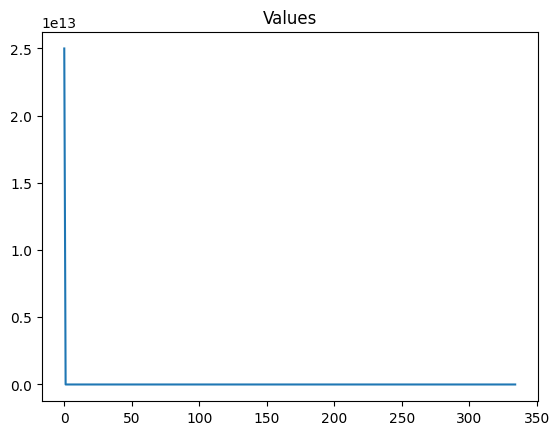

In [9]:
plt.plot(history_book['values'])
plt.title("Values")